In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

#### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)  # оценка репетитора

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)    # вероятность поступления абитуриента

In [3]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st[2, :]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

In [5]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [6]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

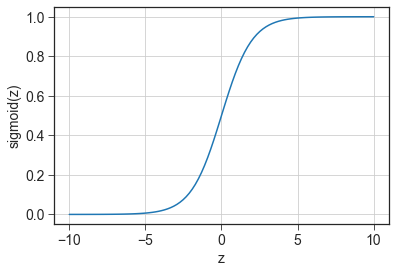

In [7]:
dots = np.linspace(-10, 10, 100)
sigmoid_value = list(map(sigmoid, dots))

plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.plot(dots, sigmoid_value)

In [8]:
alphas = [10**n for n in range(-2,3)]
n_iters = np.arange(1000, 10001, 1000)
alphas

[0.01, 0.1, 1, 10, 100]

In [9]:
n_iters

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000])

#### Логистическая регрессия

In [10]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    min_err = 100
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        #y_pred = np.dot(w, X)
        #err = calc_mse(y, y_pred)
    
    
        w -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if err < min_err:
            min_err = err
        if i % (iterations / 10) == 0:
            print(alpha, i, w, err, min_err)
    return w, err, min_err

In [11]:
min_err=100
for alpha in alphas:
    for n_iter in n_iters:
        w_calc = eval_LR_model(X_st, y, iterations=n_iter, alpha=alpha)
        if w_calc[2] < min_err and not math.isnan(w_calc[1]):
            min_err = w_calc[2]
        w = w_calc[0]

0.01 100 [ 0.25769171 -0.68297243  0.68841418  1.2405903 ] 0.5908596023453088 0.5908596023453088
0.01 200 [ 0.14805533 -0.69317972  0.77965488  1.21287192] 0.5687278067099053 0.5687278067099053
0.01 300 [ 0.06257746 -0.68605867  0.85181735  1.21283095] 0.5560473747533587 0.5560473747533587
0.01 400 [-0.00887935 -0.68415387  0.90713736  1.22443854] 0.5476800278385013 0.5476800278385013
0.01 500 [-0.0701621  -0.68661758  0.94984062  1.24404686] 0.541676599615156 0.541676599615156
0.01 600 [-0.1239972  -0.69202069  0.98318257  1.26924759] 0.536984186497779 0.536984186497779
0.01 700 [-0.17239277 -0.69933957  1.00953865  1.29824779] 0.5330427663756572 0.5330427663756572
0.01 800 [-0.21681092 -0.7078635   1.03062761  1.32973537] 0.5295551503580799 0.5295551503580799
0.01 900 [-0.25830834 -0.71709934  1.04769231  1.36276535] 0.5263621224044184 0.5263621224044184
0.01 1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747 0.5233765331724747
0.01 200 [ 0.14805533 -0.69317972

0.01 6300 [-1.88562164 -0.96676764  0.88404707  2.69439991] 0.4387283733345392 0.4387283733345392
0.01 7200 [-2.11473336 -0.97716157  0.80763414  2.8465729 ] 0.429659510433187 0.429659510433187
0.01 8100 [-2.33460343 -0.98482136  0.72972454  2.98942076] 0.42133782977792994 0.42133782977792994
0.01 9000 [-2.54576745 -0.99066711  0.65182927  3.12469136] 0.41367061625436863 0.41367061625436863
0.01 1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747 0.5233765331724747
0.01 2000 [-0.64214517 -0.81531815  1.11599369  1.72618787] 0.4994117173889704 0.4994117173889704
0.01 3000 [-0.95627497 -0.87648865  1.10170056  2.00552673] 0.4812997915130281 0.4812997915130281
0.01 4000 [-1.25395556 -0.91702026  1.05407927  2.24381099] 0.4663484120925518 0.4663484120925518
0.01 5000 [-1.53718107 -0.94412619  0.98701591  2.45304376] 0.4534151021622755 0.4534151021622755
0.01 6000 [-1.80709894 -0.96248191  0.90882535  2.64121123] 0.44193777801400824 0.44193777801400824
0.01 7000 [-2.06

0.1 1600 [-3.9429576  -1.01884757  0.10992481  4.01638187] 0.37000858928583086 0.37000858928583086
0.1 2400 [-5.16163889 -1.05560731 -0.3509117   4.83434101] 0.34024791328986803 0.34024791328986803
0.1 3200 [-6.13704685 -1.09882564 -0.70152333  5.52496735] 0.32077187047482164 0.32077187047482164
0.1 4000 [-6.96133333 -1.14371437 -0.98694403  6.13057114] 0.3066241878369146 0.3066241878369146
0.1 4800 [-7.68568501 -1.18833399 -1.23116314  6.6764768 ] 0.29555693658367593 0.29555693658367593
0.1 5600 [-8.34016004 -1.23203577 -1.44751986  7.17868525] 0.2864338954481406 0.2864338954481406
0.1 6400 [-8.94340181 -1.27464018 -1.64395933  7.64766161] 0.278626590001747 0.278626590001747
0.1 7200 [-9.50753212 -1.31613611 -1.82549895  8.0904821 ] 0.2717612040291286 0.2717612040291286
0.1 8000 [-10.04075209  -1.35657036  -1.99546097   8.51208184] 0.26560192980297886 0.26560192980297886
0.1 900 [-2.54631605 -0.99077064  0.65178699  3.12518707] 0.41372399296698187 0.41372399296698187
0.1 1800 [-4.2779

1 700 [-9.43016364 -1.3103576  -1.80071854  8.02953216] 0.2727544902432434 0.2727544902432434
1 1400 [-13.48915343  -1.63560332  -3.06844689  11.27910263] 0.23134570573783336 0.23134570573783336
1 2100 [-16.70698325  -1.90932296  -4.04452568  13.88555383] 0.20529850337162192 0.20529850337162192
1 2800 [-19.44005319  -2.14617703  -4.8614204   16.10304948] 0.18652929959331654 0.18652929959331654
1 3500 [-21.82305614  -2.35461047  -5.56659192  18.03636107] 0.1722815041719714 0.1722815041719714
1 4200 [-23.93686308  -2.54048583  -6.18747727  19.75028863] 0.16108717097018282 0.16108717097018282
1 4900 [-25.83717414  -2.70809979  -6.74248117  21.28990682] 0.15205219062213166 0.15205219062213166
1 5600 [-27.56446587  -2.86068383  -7.24471876  22.68809854] 0.14459701262684732 0.14459701262684732
1 6300 [-29.14907797  -3.00071588  -7.70387074  23.96955737] 0.13833011465223516 0.13833011465223516
1 7000 [-30.61428104  -3.13012873  -8.12726963  25.15324313] 0.1329782299638675 0.1329782299638675
1

<ipython-input-5-7d5907c1794a>:2: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-5-7d5907c1794a>:2: RuntimeWarning: invalid value encountered in multiply
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


 1600 [-69.67456367  -6.21624107 -19.52772929  55.7823504 ] nan 0.09314392491145145
10 1800 [-70.78844372  -6.28967127 -19.86286706  56.62514428] nan 0.09314392491145145
10 2000 [-71.88200185  -6.36123306 -20.19228144  57.45153324] nan 0.09314392491145145
10 300 [-57.59820191  -6.08247565 -15.38061978  47.80812828] nan 0.130339403796645
10 600 [-63.21189559  -6.53525696 -17.06930843  52.14920379] nan 0.09314392491145145
10 900 [-65.59075675  -5.94801702 -18.29747298  52.6938222 ] nan 0.09314392491145145
10 1200 [-67.3804175   -6.06313491 -18.83886092  54.04288502] nan 0.09314392491145145
10 1500 [-69.10960217  -6.17877453 -19.35791187  55.35445053] nan 0.09314392491145145
10 1800 [-70.78844372  -6.28967127 -19.86286706  56.62514428] nan 0.09314392491145145
10 2100 [-72.42152606  -6.39635983 -20.3549356   57.85889657] nan 0.09314392491145145
10 2400 [-74.01264302  -6.49932158 -20.83508521  59.05903028] nan 0.09314392491145145
10 2700 [-75.5649936   -6.59895852 -21.30413523  60.22833815]

<ipython-input-6-304f158d4adf>:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


 600 [-609.83058983  -82.56975849 -134.94842567  553.15258133] nan 1.220065627789983
100 800 [-610.09993981  -82.28832447 -135.23492798  552.88323135] nan 1.220065627789983
100 1000 [-610.30175651  -82.11119504 -135.47297803  552.68141465] nan 1.220065627789983
100 1200 [-610.46591385  -81.99002099 -135.68479849  552.51725732] nan 1.220065627789983
100 1400 [-610.60606477  -81.90354471 -135.88000254  552.37710639] nan 1.220065627789983
100 1600 [-610.72956929  -81.84057531 -136.06361367  552.25360187] nan 1.220065627789983
100 1800 [-610.84084179  -81.79451095 -136.23858781  552.14232937] nan 1.220065627789983
100 2000 [-610.94273607  -81.76113722 -136.40681307  552.04043509] nan 1.220065627789983
100 300 [-609.03546212  -83.67508862 -134.18938452  553.94770904] nan 1.220065627789983
100 600 [-609.83058983  -82.56975849 -134.94842567  553.15258133] nan 1.220065627789983
100 900 [-610.20683533  -82.19074125 -135.3581525   552.77633583] nan 1.220065627789983
100 1200 [-610.46591385  -81.

In [12]:
print(f'Наименьшее значение при alpha= 1 и количестве итераций равном 10000 {min_err}')

Наименьшее значение при alpha= 1 и количестве итераций равном 10000 0.11663474835747874


#### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [13]:
def calc_pred_proba(w, X):
    y_pred_proba = sigmoid(np.dot(w, X))
    return y_pred_proba

In [14]:
a = calc_pred_proba(w, X_st)
a

array([6.87782772e-04, 3.17269314e-29, 1.00000000e+00, 1.47770956e-16,
       1.00000000e+00, 4.78927080e-06, 1.00000000e+00, 6.03196223e-39,
       9.99327214e-01, 1.00000000e+00])

#### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [15]:
def calc_pred(w, X, threshold):
    y_pred_proba = sigmoid(np.dot(w, X))
    y_pred = np.zeros(len(y_pred_proba))
    for i in range(len(y_pred_proba)):
        y_pred[i] = 0 if y_pred_proba[i] < threshold else 1 
    return np.array(y_pred)

In [16]:
y_pred = calc_pred(w, X_st, 0.8)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

#### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [17]:
# расчёт доли правильных ответов
def accuracy(y_true, y_pred):
    z = np.count_nonzero(y_true == y_pred) 
    return z/y_true.shape[0]

In [18]:
accuracy(y, y_pred)

1.0

In [19]:
# матрица ошибок
def confusion_matrix(y_true, y_pred):
    tp = tn = fp = fn = 0
    for i in range(y_pred.shape[0]):
        if y_pred[i] == y_true[i] == 1:
            tp += 1
        elif y_pred[i] == y_true[i] == 0:
            tn += 1
        elif y_pred[i] == 1:
            fp += 1
        else:
            fn +=1
    return np.array([[tp, fp],[fn, tn]])

In [20]:
c_matrix = confusion_matrix(y, y_pred)
c_matrix

array([[5, 0],
       [0, 5]])

Расчёт точности:

$precision = \frac{TP}{TP+FP}.$

In [21]:
# точность
precision = c_matrix[0][0]/(c_matrix[0][0]+c_matrix[0][1])
precision

1.0

Расчёт полноты:

$recall(a, X) = \frac{TP}{TP+FN},$

In [22]:
# полнота
recall =  c_matrix[0][0]/(c_matrix[0][0]+c_matrix[1][0])
recall

1.0

Расчёт F-1 метрики:

$F_{1} = 2 \frac{precision \cdot recall}{precision + recall}.$

In [23]:
# F-1 score
f1_score = 2*precision*recall/(precision+recall)
f1_score

1.0

#### 6. Могла ли модель переобучиться? Почему?

Модель могла переобучиться из-за очень маленькой выборки.